In [1]:
import sys, os
import numpy as np
import pandas as pd

sys.path.append('../')
from tools.mongo_analysis_tools import *
from tools.plots import get_dendro_heatmap, get_expression_hist
from tools.get_predictive_power import gene_predictive_accuracy

#import plotly
from plotly.offline import iplot, init_notebook_mode
init_notebook_mode(connected=True) # run at the start of every ipython notebook

In [2]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}
var kernel = IPython.notebook.kernel;
var thename = window.document.getElementById("notebook_name").innerHTML;
var command = "theNotebook = " + "'"+thename+"'";
kernel.execute(command);

<IPython.core.display.Javascript object>

In [3]:
output = collect_run_output(24019, 31011, 'PAN_CANCER_classifier_BMI', verbose=1)

All these experiments belong to experiment: PAN_CANCER_classifier_BMI


In [4]:
runs_per_classifier(output)

,id,#runs
name,,
LinearSVC,"[24019, 24083, 24151, 24224, 24300, 24373, 244...",726
RandomForestClassifier,"[24062, 24067, 24073, 24078, 24086, 24092, 240...",2345


In [5]:
predict_label = output[0]['config']['predict_label']
data_latex(predict_label)

For the label bmi_category we have 2845 samples and 4 different labels. The classes and their support are as follows:\\
healthy: 920, obese: 952, overweight: 892, underweight: 81


In [6]:
selected_genes_ids, similarities = compute_gene_importance(output, similarity=10, latex=True)
similarities

\textbf{Gene analysis:}\\
The models selected have the following number of genes:\\
LinearSVC: 12667\\
RandomForestClassifier: 18158\\
Intersection: 6085\\


{'LinearSVC': [0.558022933965956,
  0.42888765910345833,
  0.09970372126096248,
  0.5588277896288872,
  0.3741461937488346,
  0.32410610847814747,
  0.356946199199821,
  0.5165021713382969,
  0.6152033162257924,
  0.23401884160942885],
 'RandomForestClassifier': [0.4571007546961669,
  0.4526983602342467,
  0.45518004370258364,
  0.4594961347068005,
  0.4949123290186322,
  0.4438290645368262,
  0.47634245745439757,
  0.3769321144031567,
  0.5577954620552676,
  0.49487186547708]}

In [7]:
latex_genes(selected_genes_ids)

These are the top 6085 genes in order of importance:\\
EMX2$\text{\textbar}$2018, EFHC2$\text{\textbar}$80258, CCDC173$\text{\textbar}$129881, CCNA1$\text{\textbar}$8900, REN$\text{\textbar}$5972, LRRTM1$\text{\textbar}$347730, ALKAL2$\text{\textbar}$285016, SCGB3A1$\text{\textbar}$92304, BMPR1B$\text{\textbar}$658, NDP$\text{\textbar}$4693, UTS2$\text{\textbar}$10911, RIIAD1$\text{\textbar}$284485, SHISAL2B$\text{\textbar}$100132916, GPR143$\text{\textbar}$4935, SLC22A16$\text{\textbar}$85413, HMHB1$\text{\textbar}$57824, FAM189A2$\text{\textbar}$9413, NME5$\text{\textbar}$8382, FST$\text{\textbar}$10468, RPS4Y1$\text{\textbar}$6192, SIGLEC12$\text{\textbar}$89858, STOML3$\text{\textbar}$161003, PDCL2$\text{\textbar}$132954, PLEKHG4B$\text{\textbar}$153478, TUNAR$\text{\textbar}$100507043, HIST1H4A$\text{\textbar}$8359, TMEM215$\text{\textbar}$401498, MBD3L1$\text{\textbar}$85509, CES1$\text{\textbar}$1066, LDLRAD1$\text{\textbar}$388633, CAPN6$\text{\textbar}$827, GUCA2A$\text{\textb

In [7]:
print_latex_config(output)

\textbf{Framework configuration:}\\
Data subset:\\
Predict label: bmi\_category\\
Split label: bmi\_category\\
Train test split: 0.25\\
Classifiers: LinearSVC and RandomForestClassifier\\
Stop running: similarity $> 0.8$, for 10 consecutive runs\\
Number of genes selected per algorithm: 250\\


In [8]:
print_latex_prediction_metrics(output)

\textbf{Prediction metrics:}\\
Average accuracy: 0.4162 (0.0003)\\
Average Cohen kappa: 0.1369 (0.0006)\\
Average accuracy LSVM: 0.4161 (0.0003)\\
Average accuracy RandomForestClassifier: 0.4162 (0.0003)\\


Saved cm image T_classifier_BMI_cm.png

The Confusion matrix can be found in figure \ref{fig:cm-BMI}. The Classification Report can be found in table \ref{tab:cr-BMI}.

\begin{figure}[H]
\centering
\includegraphics[height=5cm]{T_classifier_BMI_cm.png}
\caption{Normalized Confusion Matrix over the test set}
\label{fig:cm-BMI}
\end{figure}


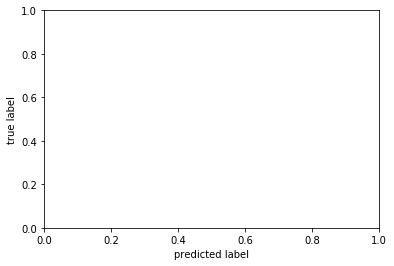

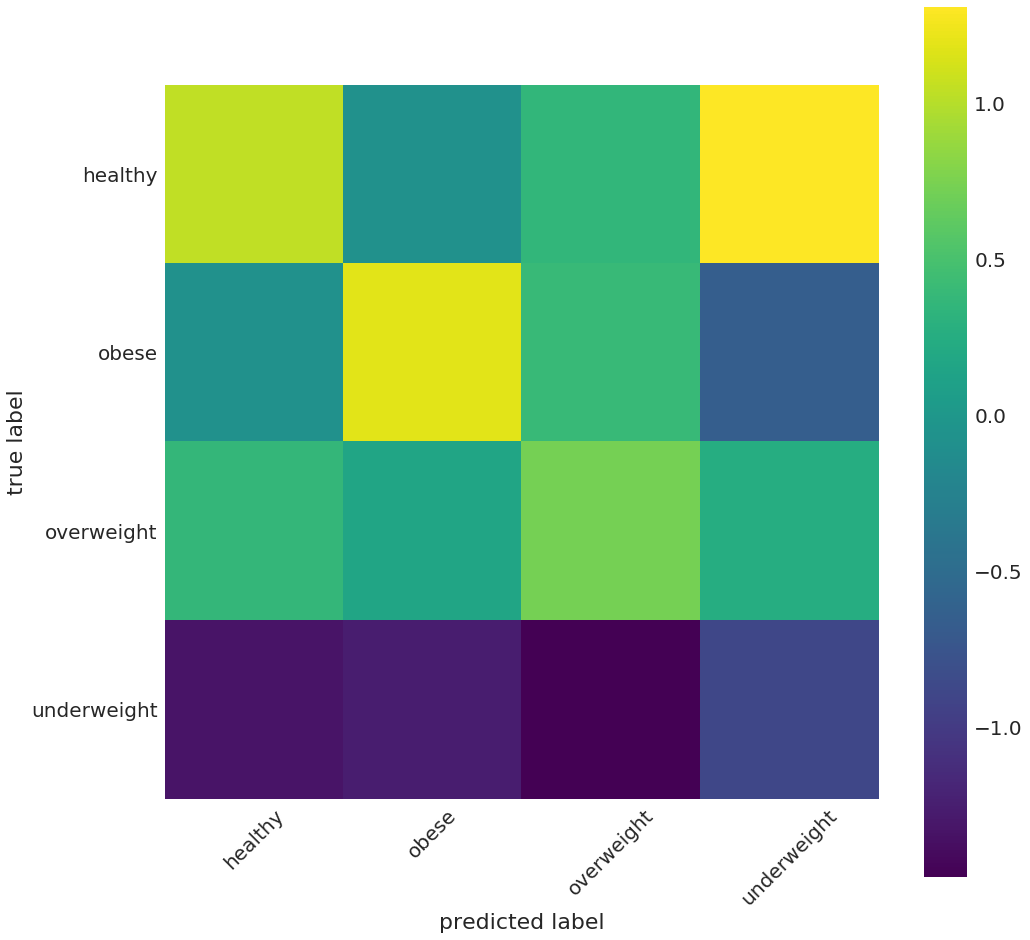

In [9]:
save_confusion_matrix(output, theNotebook, large_font=True)

In [17]:
print_latex_cr(output)

\textbf{Classification Report:}\\
\begin{tabular}{lrrrr}
\toprule
{} &    fscore &  precision &    recall &  support \\
\midrule
healthy     &  0.449157 &   0.412949 &  0.495237 &    230.0 \\
obese       &  0.465702 &   0.473252 &  0.459628 &    238.0 \\
overweight  &  0.342105 &   0.360214 &  0.327254 &    223.0 \\
underweight &  0.003938 &   0.016368 &  0.002326 &     21.0 \\
\bottomrule
\end{tabular}



In [27]:
gene_predictive_accuracy(output, selected_genes_ids, latex=True)

Reading data
Predicting and evaluating LinearSVC
Predicting and evaluating LinearSVC
Predicting and evaluating LinearSVC
Predicting and evaluating LinearSVC
Predicting and evaluating LinearSVC
Predicting and evaluating LinearSVC
Predicting and evaluating LinearSVC
Predicting and evaluating LinearSVC
Predicting and evaluating LinearSVC
Predicting and evaluating LinearSVC
Predicting and evaluating RandomForestClassifier
Predicting and evaluating RandomForestClassifier
Predicting and evaluating RandomForestClassifier
Predicting and evaluating RandomForestClassifier
Predicting and evaluating RandomForestClassifier
Predicting and evaluating RandomForestClassifier
Predicting and evaluating RandomForestClassifier
Predicting and evaluating RandomForestClassifier
Predicting and evaluating RandomForestClassifier
Predicting and evaluating RandomForestClassifier
We have 6085 selected genes as a result, doing the same prediction again but only with these genes we get the following accuracies averag

{'LinearSVC': [0.40308988764044945,
  0.40308988764044945,
  0.40308988764044945,
  0.40308988764044945,
  0.40308988764044945,
  0.40308988764044945,
  0.40308988764044945,
  0.40308988764044945,
  0.40308988764044945,
  0.40308988764044945],
 'LinearSVC_avr': 0.40308988764044945,
 'RandomForestClassifier': [0.41292134831460675,
  0.37780898876404495,
  0.41292134831460675,
  0.42134831460674155,
  0.4058988764044944,
  0.40730337078651685,
  0.4044943820224719,
  0.4199438202247191,
  0.4241573033707865,
  0.40730337078651685],
 'RandomForestClassifier_avr': 0.40941011235955055}

In [19]:
latex_genes(selected_genes_ids[:50])

These are the top 50 genes in order of importance:\\
EMX2$\text{\textbar}$2018, EFHC2$\text{\textbar}$80258, CCDC173$\text{\textbar}$129881, CCNA1$\text{\textbar}$8900, REN$\text{\textbar}$5972, LRRTM1$\text{\textbar}$347730, ALKAL2$\text{\textbar}$285016, SCGB3A1$\text{\textbar}$92304, BMPR1B$\text{\textbar}$658, NDP$\text{\textbar}$4693, UTS2$\text{\textbar}$10911, RIIAD1$\text{\textbar}$284485, SHISAL2B$\text{\textbar}$100132916, GPR143$\text{\textbar}$4935, SLC22A16$\text{\textbar}$85413, HMHB1$\text{\textbar}$57824, FAM189A2$\text{\textbar}$9413, NME5$\text{\textbar}$8382, FST$\text{\textbar}$10468, RPS4Y1$\text{\textbar}$6192, SIGLEC12$\text{\textbar}$89858, STOML3$\text{\textbar}$161003, PDCL2$\text{\textbar}$132954, PLEKHG4B$\text{\textbar}$153478, TUNAR$\text{\textbar}$100507043, HIST1H4A$\text{\textbar}$8359, TMEM215$\text{\textbar}$401498, MBD3L1$\text{\textbar}$85509, CES1$\text{\textbar}$1066, LDLRAD1$\text{\textbar}$388633, CAPN6$\text{\textbar}$827, GUCA2A$\text{\textbar

In [10]:
predict_label = output[0]['config']['predict_label']
selected_genes_data, selected_genes_ids, sample_to_label = get_dendro_data(predict_label, selected_genes_ids)

heatmap, legend, color_scale = get_dendro_heatmap(selected_genes_data, selected_genes_ids, sample_to_label, color_option=1, nb_genes_used=50)
histogram = get_expression_hist(selected_genes_data, decimals=2, drop_zero=True, log=False, color_scale=color_scale)

In [11]:
#iplot(heatmap)

In [12]:
#iplot(histogram)

In [13]:
latex_heatmap(heatmap, histogram, theNotebook)

Succeeded in saving T_classifier_BMI_hist.png
The dendro-heatmap can be found in figure \ref{fig:heat-BMI}. The top 50 most enriched pathways can be found in table \ref{tab:pw-BMI}.

\begin{figure}[H]
\centering
\includegraphics[height=5cm]{T_classifier_BMI_heat.png}
\caption{Dendro-heatmap for the top genes}
\label{fig:heat-BMI}
\end{figure}


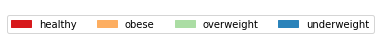

In [24]:
path = '../plots/figures/'
leg_name = '{}_legend.png'.format(theNotebook)
legend.savefig(os.path.join(path, leg_name)) 
legend

In [25]:
pw_latex(selected_genes_ids)

querying 1-50...done. [ from cache ]
querying 0/416
querying 50/416
querying 100/416
querying 150/416
querying 200/416
querying 250/416
querying 300/416
querying 350/416
querying 400/416
collected the 50 most enriched pathways
The top 50 most enriched pathways based on these genes are:\\
\begin{tabular}{llr}
\toprule
{} &                                               name &   p\_value \\
\midrule
0  &  TGF-beta signaling pathway - Homo sapiens (human) &  0.001127 \\
1  &                    t(4;14) translocations of FGFR3 &  0.002435 \\
2  &                             BMP receptor signaling &  0.004486 \\
3  &                                  Heroin metabolism &  0.004865 \\
4  &  Signaling pathways regulating pluripotency of ... &  0.005007 \\
5  &  Phosphorylation of proteins involved in the G2... &  0.007289 \\
6  &                        TGF-beta Receptor Signaling &  0.007949 \\
7  &                        Trandolapril Action Pathway &  0.009707 \\
8  &                        Resc